In [276]:
import numpy as np
from scipy import stats
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
titanic = pd.read_csv("Data/train.csv")

In [278]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
def height_notation(plot , coordinator, type_of_height = int):
    for p in plot.patches:
        height = p.get_height().round(2)
        text = str(type_of_height(height))
        plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = "center")

In [281]:
survived_dict = {0: "Dead", 1: "Alive"}
titanic["Survived"] = titanic["Survived"].map(survived_dict)

In [282]:
sex_dict = {'male':'Male' , 'female':'Female'}
titanic['Sex'] = titanic['Sex'].map(sex_dict)

In [283]:
class_dict = {1: "First Class", 2: "Second Class", 3: "Third Class"}
titanic["Pclass"] = titanic["Pclass"].map(class_dict)

In [284]:
embarked_dict = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
titanic["Embarked"] = titanic["Embarked"].map(embarked_dict)

In [285]:
survived_sex = pd.crosstab(titanic["Survived"], titanic["Sex"]).reset_index()

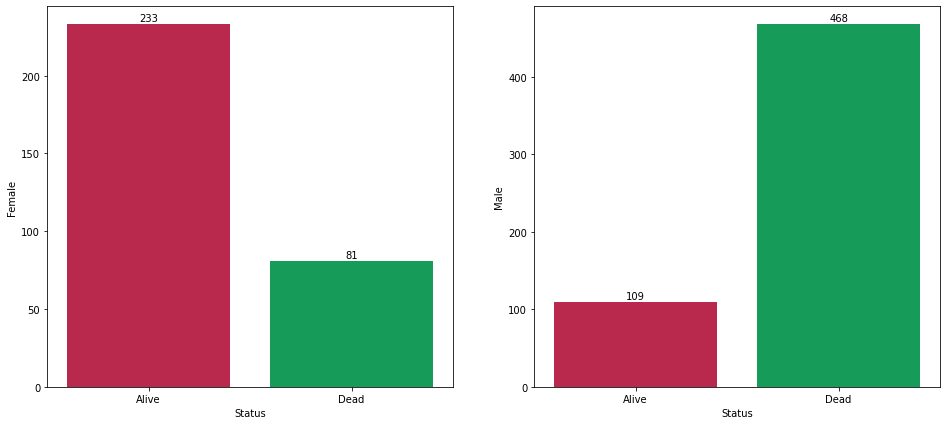

In [287]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
# Female Survived
survived_female = sns.barplot(x = survived_sex["Survived"], y = "Female", data= survived_sex,
                       palette = ['#D11141', '#00B159'], ax = axis[0])
height_notation(survived_female, coordinator = 2)
survived_female.set_xlabel("Status")
survived_female.set_ylabel("Female")
# Male Survived
survived_male = sns.barplot(x = survived_sex["Survived"], y = "Male", data= survived_sex,
                       palette = ['#D11141', '#00B159'], ax = axis[1])
height_notation(survived_male, coordinator = 4)
survived_male.set_xlabel("Status")
survived_male.set_ylabel("Male")
plt.show()

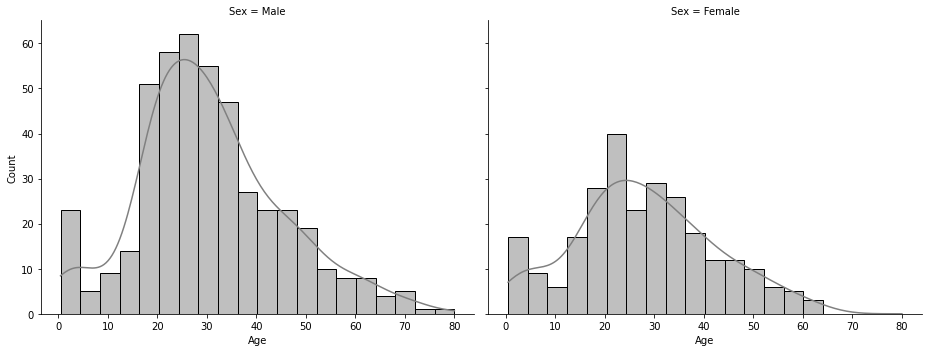

In [288]:
sns.displot(x= "Age", data = titanic, col = "Sex", kde = True, color = "gray", aspect= 1.3)
plt.show()

In [289]:
sex_summary_stats = titanic.groupby(["Survived","Sex"]).agg({"Age": [np.min, np.median, np.mean, np.max]})
sex_summary_stats.columns = ["Age Min", "Age Median", "Age Mean", "Age Max"]
sex_summary_stats = sex_summary_stats.reset_index()

In [290]:
sex_summary_stats

,Survived,Sex,Age Min,Age Median,Age Mean,Age Max
0,Alive,Female,0.75,28.0,28.847716,63.0
1,Alive,Male,0.42,28.0,27.276022,80.0
2,Dead,Female,2.00,24.5,25.046875,57.0
3,Dead,Male,1.00,29.0,31.618056,74.0


In [291]:
titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

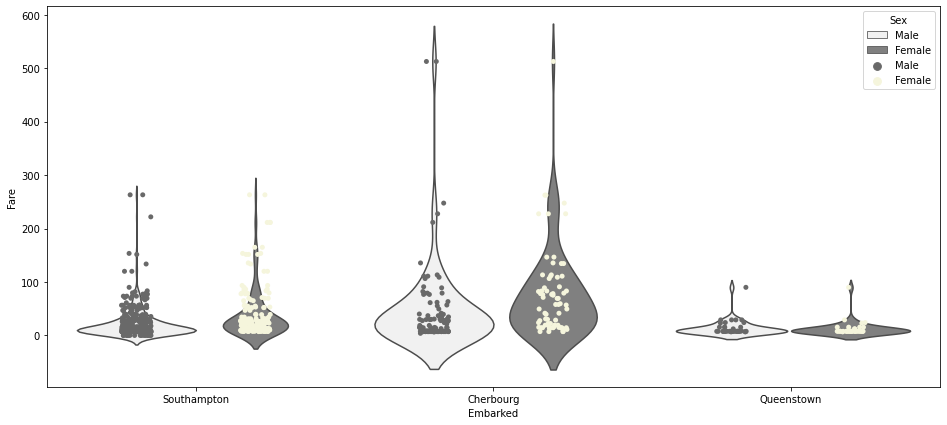

In [292]:
plt.figure(figsize = (16, 7))
embarked = sns.violinplot(x = "Embarked", y = "Fare", hue= "Sex", data = titanic, color=".5", inner = None)
embarked = sns.stripplot(x = "Embarked", y = "Fare", data = titanic, hue = "Sex", palette = ["dimgray", "beige"], color=".25", dodge = True)
plt.show()

In [328]:
sibling_spouse = pd.crosstab(titanic["SibSp"], titanic["Survived"]).reset_index()

In [329]:
sibsp_palette = list(map( lambda x : 'red' if x == 1 else 'gray'  , [each for each in titanic['SibSp'].sort_values().unique()]))

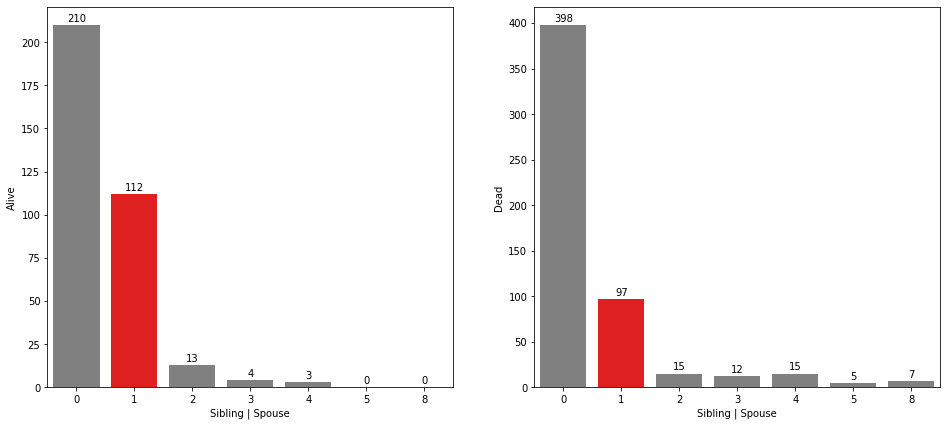

In [330]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
alive = sns.barplot(x = "SibSp", y = "Alive", data = sibling_spouse, palette= sibsp_palette, ax = axis[0])
alive.set_xlabel("Sibling | Spouse")
height_notation(alive, coordinator = 2)
dead = sns.barplot(x = "SibSp", y = "Dead", data = sibling_spouse, palette= sibsp_palette, ax = axis[1])
dead.set_xlabel("Sibling | Spouse")
height_notation(dead, coordinator = 4)

NameError: name 'color_embarked' is not defined

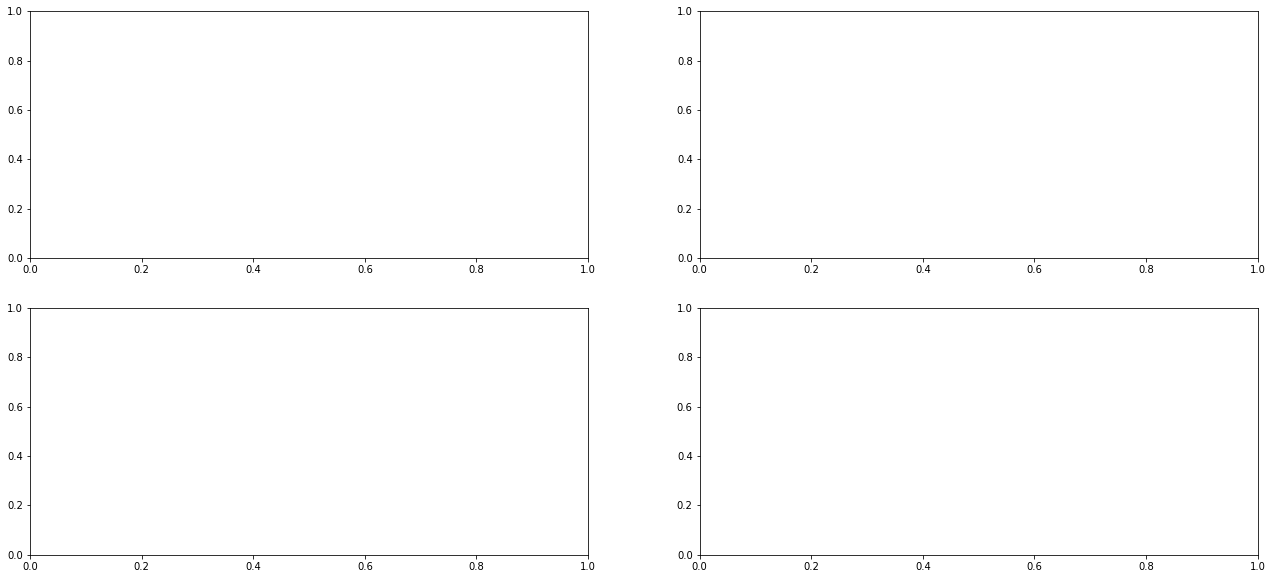

In [366]:
fig , axes = plt.subplots(2,2,figsize = (22, 10))
embarked_total = sns.countplot(x = 'Embarked'  , data = titanic, palette = color_embarked , ax = axes[0])
notation(embarked_total , 5, titanic , True)
embarked_total.set_xlabel('Where Passengers Embarked' , fontsize = 15)
embarked_total.set_ylabel('Passengers Counts' , fontsize = 15)
pclass_embarked = sns.countplot(x = 'Embarked' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes , ax = axes[1])
notation(pclass_embarked , 5, titanic , True)
pclass_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
pclass_embarked.set_ylabel('Passengers Counts', fontsize = 15)
pclass_embarked.legend(title = 'Passengers Classes')
survived_embarked = sns.countplot(x = 'Embarked' , hue = 'Survived' , data = titanic, palette = color_dead_alive, ax = axes[2])
notation(survived_embarked , 5, titanic , True)
survived_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
survived_embarked.set_ylabel('Passengers Counts', fontsize = 15)
survived_embarked.legend(title = 'Survived')
sex_embarked = sns.countplot(x = 'Embarked' , hue = 'Sex' , data = titanic, palette = color_sex , ax = axes[3])
notation(sex_embarked , 5, titanic , True)
sex_embarked.set_xlabel('Where Passengers Embarked' , fontsize = 15)
sex_embarked.set_ylabel('Passengers Counts' , fontsize = 15)
sex_embarked.legend(title = 'Gender')
plt.show()
